In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#this will allow the plot to be inline in the browser
%matplotlib inline

In [24]:
g = nx.Graph()
g=nx.read_pajek("Chicago.net")  #read the data 
G = max(nx.connected_component_subgraphs(g), key=len)

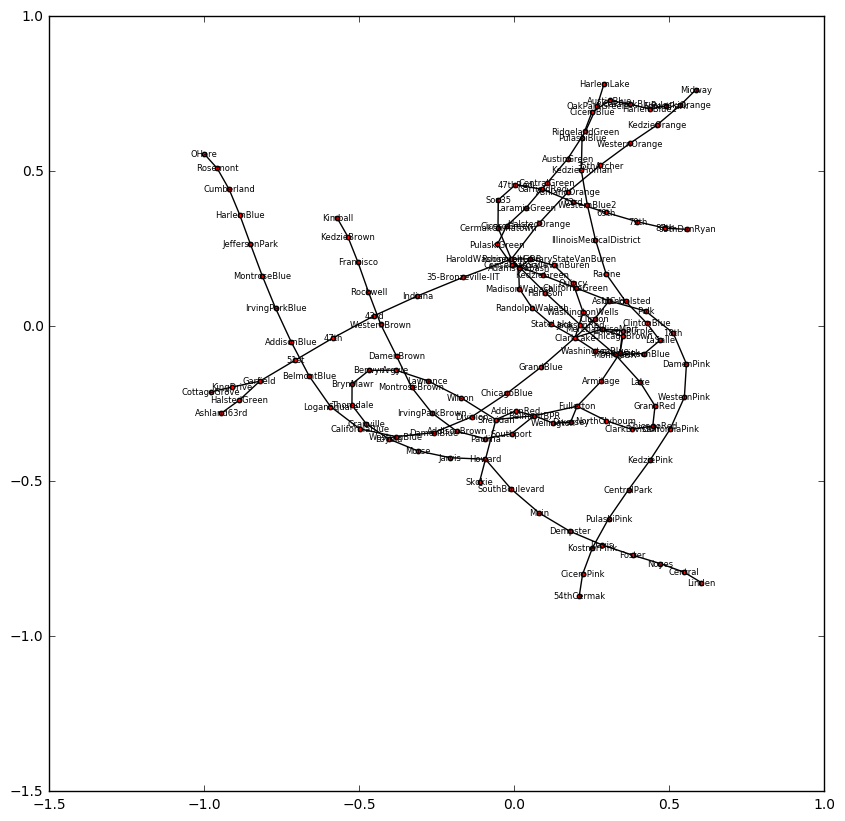

In [25]:
plt.figure(1,figsize=(10,10)) 
nx.draw_networkx(G,node_size=10,font_size=6)

## Histogram of degree values

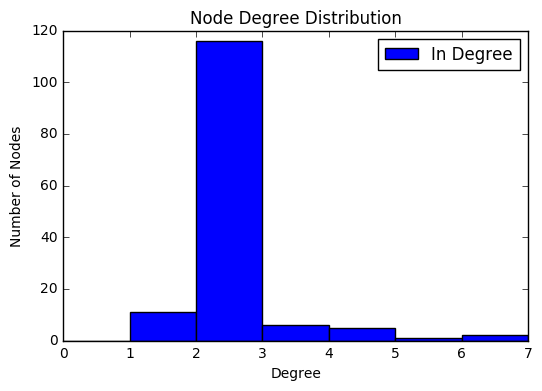

In [17]:
#array of indegrees, out degrees, and degrees
    
deg = dict(G.degree()).values()

#histogram of each
hist, bins = np.histogram(deg, bins = range(0,8))
#hist2, bins = np.histogram(oud, bins = range(0,8))


#formatting
width = (bins[1] - bins[0]) 
center = (bins[:-1] + bins[1:]) / 2

#bar graph containing all three
fig = plt.figure()
plt.bar(bins[:-1], hist, width = width, color = 'b', label = 'In Degree')
#plt.bar(bins[:-1] + width, hist2, width = width, color= 'r', label = "Out Degree")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Node Degree Distribution")
plt.show()


## Let's find the maximun of the shortest path lengths

In [6]:
lengths = nx.shortest_path_length(G)
st_length = {}  #this will svaes the maximun path per station
ml=0
for key in lengths:   #iterates in all the lengths per station 
   ll = key     #only gives an intuitive name
   i = max(ll[1].values())  #finds the maximun value of length    
   st_length[ll[0]] = i  #ll[0] has the name of the station and and i the value 
   if i > ml:
      ml = i  #this will save the overall maximun
   print "For ", ll[0]," max length is ",i 

print "The maximun length in the network is ",ml

For  Wilson  max length is  24
For  69th  max length is  27
For  PulaskiOrange  max length is  27
For  WesternBrown  max length is  29
For  95thDanRyan  max length is  30
For  Sedgwick  max length is  19
For  Indiana  max length is  23
For  51st  max length is  26
For  RidgelandGreen  max length is  28
For  BelmontBlue  max length is  25
For  IrvingParkBlue  max length is  27
For  MadisonWabash  max length is  20
For  Loyola  max length is  27
For  47th  max length is  25
For  ClarkDivision  max length is  22
For  HalstedGreen  max length is  28
For  47thRed  max length is  24
For  JacksonBlue  max length is  19
For  LoganSquare  max length is  24
For  Midway  max length is  28
For  Kimball  max length is  33
For  Paulina  max length is  24
For  Sox35  max length is  23
For  WashingtonBlue  max length is  18
For  KostnerPink  max length is  28
For  Argyle  max length is  26
For  LaSalle  max length is  20
For  Armitage  max length is  20
For  Polk  max length is  20
For  WesternPink  m

In [7]:
for key in st_length:  #iterates all lengths of each node
    if st_length[key] == ml: #if it equals to the maximun
       print key   #prints the name of the station
       p = nx.shortest_path(g,key)  #calculates all shorthest path from that station
       for k in p:   #iterates all the paths
          if nx.shortest_path_length(g,key,k)==ml: #finds the path that has a length 
                                                   #equal to the maximum   
             print p[k]   # writes the path

Kimball
[u'Kimball', u'KedzieBrown', u'Francisco', u'Rockwell', u'WesternBrown', u'DamenBrown', u'MontroseBrown', u'IrvingParkBrown', u'AddisonBrown', u'Paulina', u'Southport', u'BelmontBPR', u'Fullerton', u'Armitage', u'Sedgwick', u'ChicagoPurple', u'MerchandiseMart', u'ClarkLake', u'GrandBlue', u'ChicagoBlue', u'Division', u'DamenBlue', u'WesternBlue', u'CaliforniaBlue', u'LoganSquare', u'BelmontBlue', u'AddisonBlue', u'IrvingParkBlue', u'MontroseBlue', u'JeffersonPark', u'HarlemBlue', u'Cumberland', u'Rosemont', u'OHare']
OHare
[u'OHare', u'Rosemont', u'Cumberland', u'HarlemBlue', u'JeffersonPark', u'MontroseBlue', u'IrvingParkBlue', u'AddisonBlue', u'BelmontBlue', u'LoganSquare', u'CaliforniaBlue', u'WesternBlue', u'DamenBlue', u'Division', u'ChicagoBlue', u'GrandBlue', u'ClarkLake', u'MerchandiseMart', u'ChicagoPurple', u'Sedgwick', u'Armitage', u'Fullerton', u'BelmontBPR', u'Southport', u'Paulina', u'AddisonBrown', u'IrvingParkBrown', u'MontroseBrown', u'DamenBrown', u'WesternBro

In [8]:
lengths = nx.shortest_path_length(G)
plengths=[]
for key in lengths:   #iterates all the kengths
   ll = key
   for i in ll[1].values():    #saves a list with the lengths greater than zero
      if i > 0:plengths.append(i)

In [9]:
len(plengths)

19740

### Possible combinations

In [10]:
G.number_of_nodes()*(G.number_of_nodes()-1)

19740

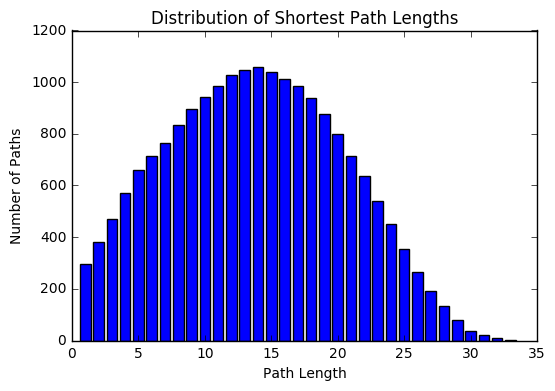

In [18]:
hist4, bins4 = np.histogram(plengths, bins = range(1,35))

plt.bar(bins4[:-1], hist4, align = 'center', color = 'b')

plt.xlabel("Path Length")
plt.ylabel("Number of Paths")
plt.title("Distribution of Shortest Path Lengths")
plt.show()

In [13]:
g.number_of_nodes()

221

In [15]:
(221.0*220.0)

48620.0

In [16]:
nx.average_shortest_path_length(G)

13.826545086119554